# Social Media Analysis

**Objetives**: Collecting, cleaning and analyzing data on social media posts.

Extra: Implementation a very simple machine-learning example.


For this project, a synthetic Twitter-like dataset was created. **Run the cell bellow only if you haven't generated the dataset yet**.  It will execute the generator script located at `../src/generate_dataset.py` and create `../data/tweets_synthetic.csv`.

In [2]:
!python ../src/generate_dataset.py

Dataset generated successfully at ../data/tweets_synthetic.csv
   user_id       category  followers  ...  sentiment  posted_hour  viral
0      103  Entertainment    63670.0  ...    neutral           21  False
1      180       Politics    48924.0  ...   negative            1  False
2       93         Sports    49758.0  ...   positive           18  False
3       15       Politics    74603.0  ...   positive           19  False
4      107         Sports    68394.0  ...   negative           19  False
5       72       Politics    49188.0  ...   positive           23  False
6      189           Tech    54352.0  ...   negative           13  False
7       21         Sports    47688.0  ...   negative            0  False
8      103           Tech    78299.0  ...    neutral            9  False
9      122  Entertainment     2769.0  ...    neutral           15   True

[10 rows x 8 columns]


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data into a Pandas DataFrame and explore the data

In [4]:
data_path = "../data/tweets_synthetic.csv"
df = pd.read_csv(data_path)
print("Shape:", df.shape)
df.head(10)

Shape: (1000, 8)


,user_id,category,followers,likes,retweets,sentiment,posted_hour,viral
0,103,Entertainment,63670.0,154,21,neutral,21,False
1,180,Politics,48924.0,159,30,negative,1,False
2,93,Sports,49758.0,156,36,positive,18,False
3,15,Politics,74603.0,144,27,positive,19,False
4,107,Sports,68394.0,139,33,negative,19,False
5,72,Politics,49188.0,148,27,positive,23,False
6,189,Tech,54352.0,154,32,negative,13,False
7,21,Sports,47688.0,140,31,negative,0,False
8,103,Tech,78299.0,138,33,neutral,9,False
9,122,Entertainment,2769.0,155,37,neutral,15,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      1000 non-null   int64  
 1   category     1000 non-null   object 
 2   followers    970 non-null    float64
 3   likes        1000 non-null   int64  
 4   retweets     1000 non-null   int64  
 5   sentiment    970 non-null    object 
 6   posted_hour  1000 non-null   int64  
 7   viral        1000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df.describe()

,user_id,followers,likes,retweets,posted_hour
count,1000.000000,9.700000e+02,1000.000000,1000.000000,1000.000000
mean,101.272000,6.049803e+04,176.968000,29.994000,11.493000
std,57.319836,1.425405e+05,387.651631,5.610654,7.010214
min,1.000000,2.130000e+02,108.000000,17.000000,0.000000
25%,51.000000,2.677850e+04,142.000000,26.000000,5.000000
50%,103.500000,4.976550e+04,149.000000,30.000000,12.000000
75%,149.000000,7.568925e+04,157.000000,34.000000,18.000000
max,199.000000,1.999840e+06,5640.000000,47.000000,23.000000


In [7]:
df[['followers','likes','retweets']].describe()

,followers,likes,retweets
count,9.700000e+02,1000.000000,1000.000000
mean,6.049803e+04,176.968000,29.994000
std,1.425405e+05,387.651631,5.610654
min,2.130000e+02,108.000000,17.000000
25%,2.677850e+04,142.000000,26.000000
50%,4.976550e+04,149.000000,30.000000
75%,7.568925e+04,157.000000,34.000000
max,1.999840e+06,5640.000000,47.000000


Category counts:
 category
Entertainment    266
Tech             257
Politics         253
Sports           224
Name: count, dtype: int64


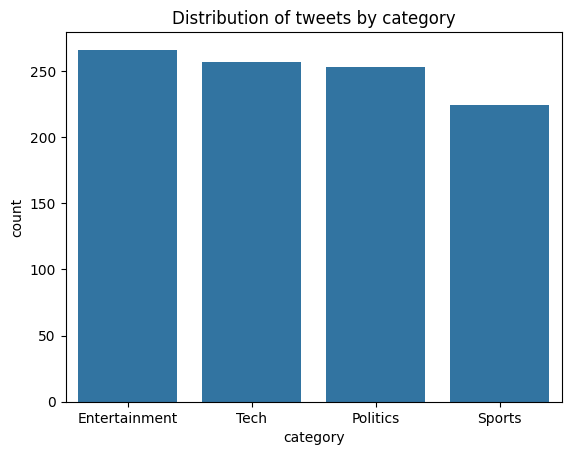

In [10]:
print('Category counts:\n', df['category'].value_counts())

sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Distribution of tweets by category')
plt.show()


Sentiment counts:
 sentiment
negative    466
neutral     313
positive    191
NaN          30
Name: count, dtype: int64


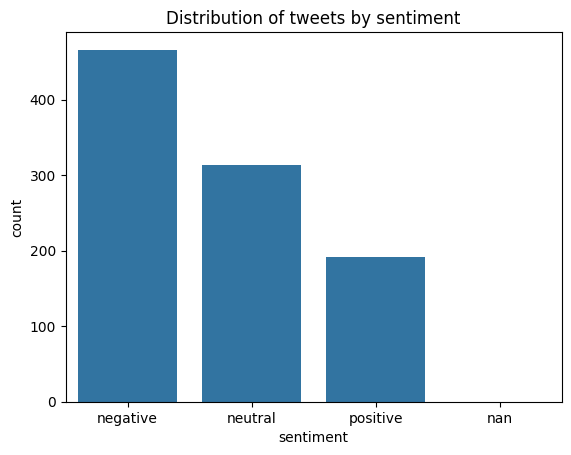

In [12]:
print('\nSentiment counts:\n', df['sentiment'].value_counts(dropna=False))

sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts(dropna=False).index)
plt.title('Distribution of tweets by sentiment')
plt.show()

In [13]:
print('Missing values per column:\n', df.isnull().sum())

Missing values per column:
 user_id         0
category        0
followers      30
likes           0
retweets        0
sentiment      30
posted_hour     0
viral           0
dtype: int64


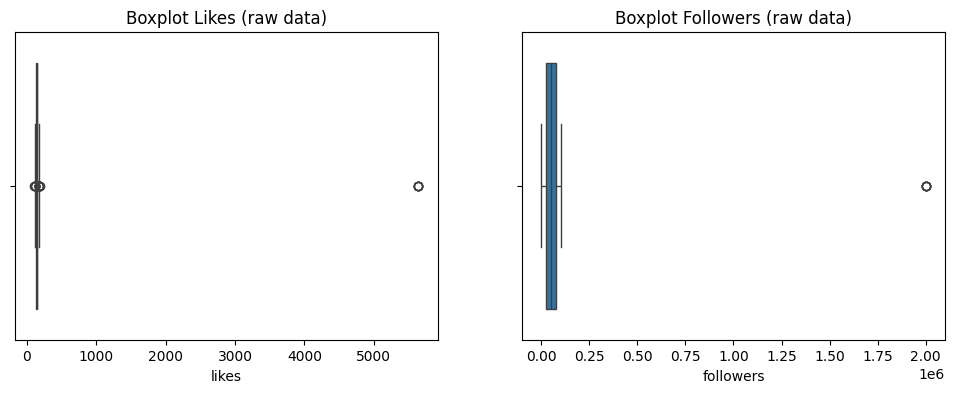

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(x=df['likes'], ax=axes[0])
axes[0].set_title('Boxplot Likes (raw data)')
sns.boxplot(x=df['followers'], ax=axes[1])
axes[1].set_title('Boxplot Followers (raw data)')
plt.show()

## Clean the data

Remove the null values:

In [15]:
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['followers', 'sentiment']).reset_index(drop=True)

print('\nRows before dropna:', df.shape)
print('\nRows after dropna:', df_clean.shape)


Rows before dropna: (1000, 8)

Rows after dropna: (940, 8)


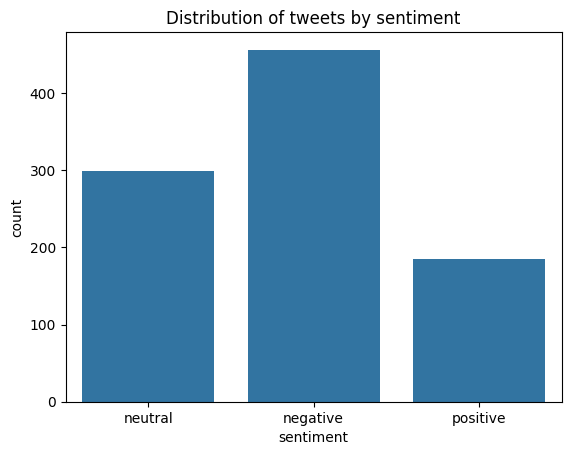

In [20]:
# Sentiment distribution
sns.countplot(data=df_clean, x='sentiment')
plt.title('Distribution of tweets by sentiment')
plt.show()

Adjust outliers to a limit based on the 95th percentile:

In [16]:
max_followers = df_clean['followers'].quantile(0.95)
max_likes = df_clean['likes'].quantile(0.95)
print(f"Max followers adjusted value = {max_followers}, Max likes adjusted value = {max_likes}")

df_clean['followers'] = df_clean['followers'].clip(upper=max_followers)
df_clean['likes'] = df_clean['likes'].clip(upper=max_likes)

Max followers adjusted value = 96116.75, Max likes adjusted value = 170.0


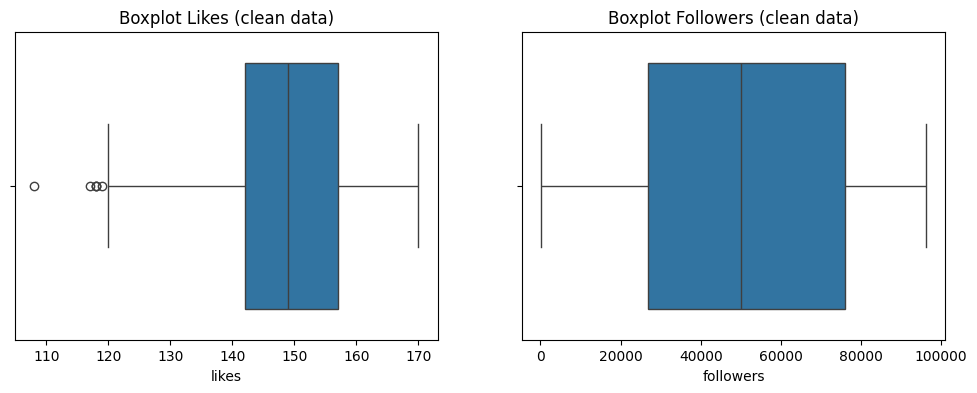

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(x=df_clean['likes'], ax=axes[0])
axes[0].set_title('Boxplot Likes (clean data)')
sns.boxplot(x=df_clean['followers'], ax=axes[1])
axes[1].set_title('Boxplot Followers (clean data)')
plt.show()

## Visualization and Analysis

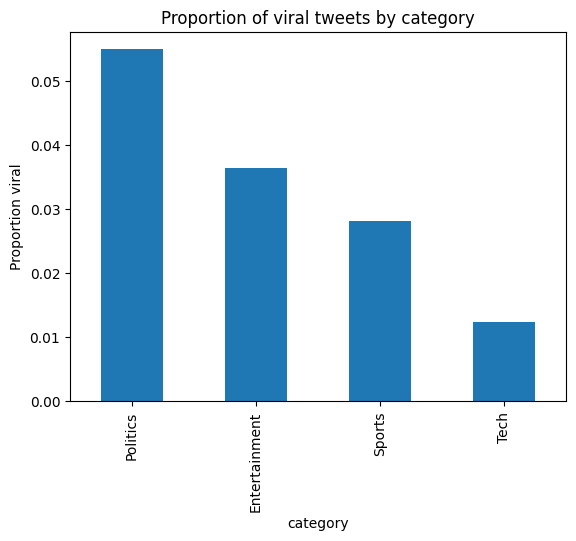

In [21]:
# Proportion of viral tweets by category
df_clean.groupby('category')['viral'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Proportion viral')
plt.title('Proportion of viral tweets by category')
plt.show()

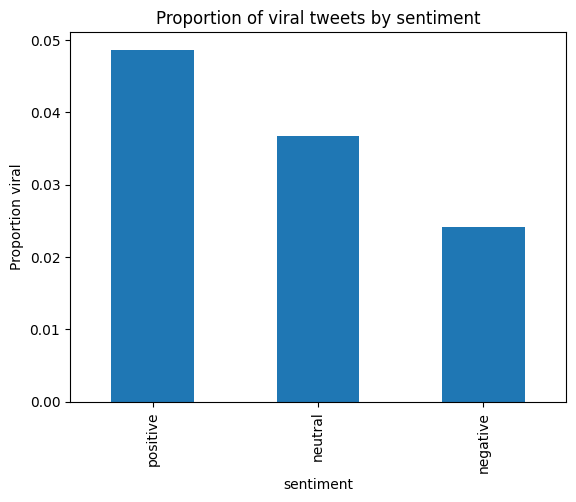

In [22]:
# Proportion of viral tweets by sentiment
df_clean.groupby('sentiment')['viral'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Proportion viral')
plt.title('Proportion of viral tweets by sentiment')
plt.show()

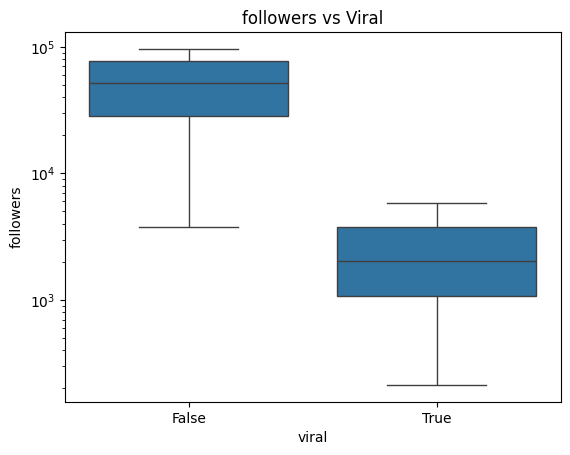

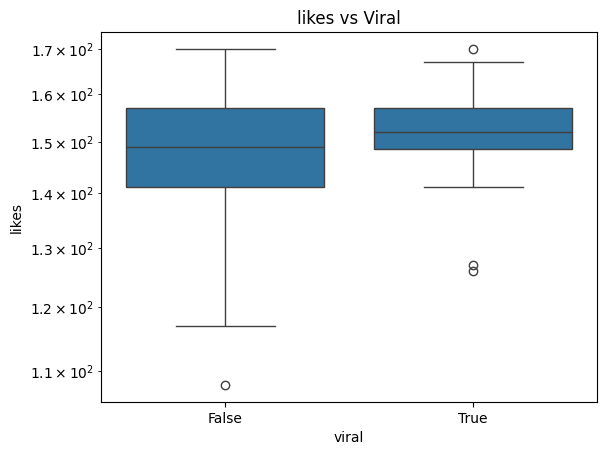

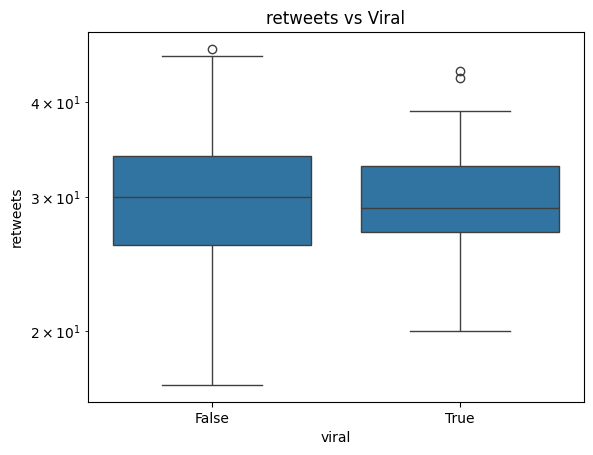

In [24]:
numeric_cols = ['followers', 'likes', 'retweets']

for col in numeric_cols:
    sns.boxplot(x='viral', y=col, data=df_clean)
    plt.title(f'{col} vs Viral')
    plt.yscale('log')  # opcional si hay outliers muy grandes
    plt.show()

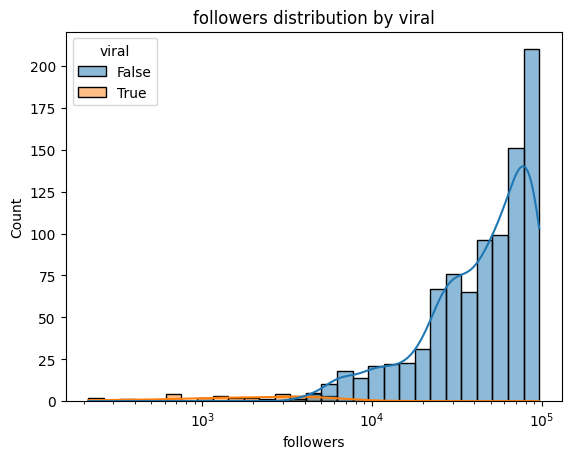

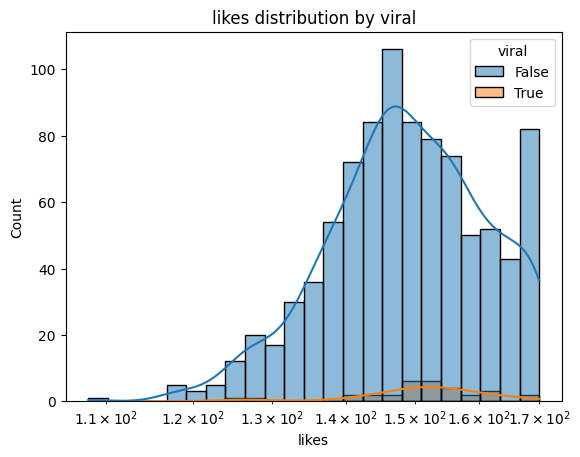

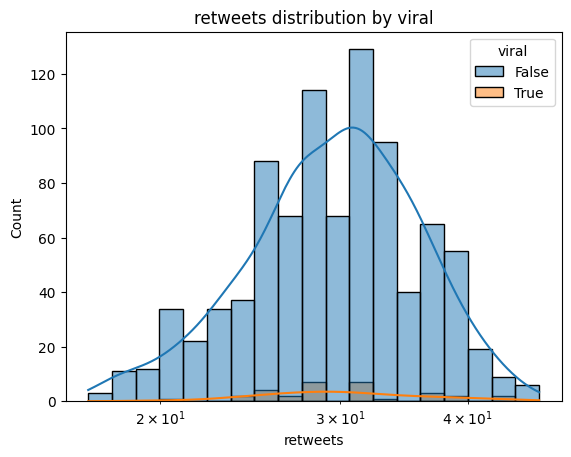

In [25]:
for col in numeric_cols:
    sns.histplot(data=df_clean, x=col, hue='viral', kde=True, log_scale=True)
    plt.title(f'{col} distribution by viral')
    plt.show()

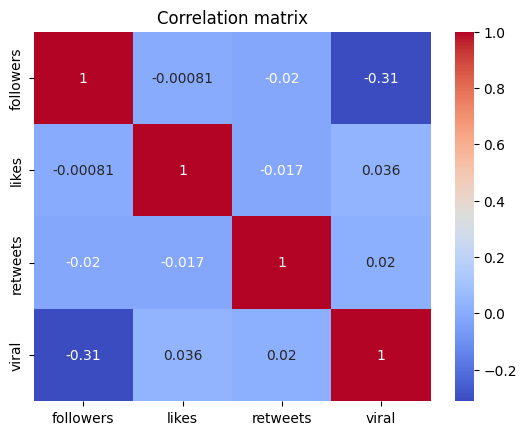

In [26]:
corr = df_clean[['followers','likes','retweets','viral']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()